## About Dataset
**Context**
- **The Pakistan Super League (PSL) is a professional Twenty20 cricket league in Asia, primarily held in Pakistan and the UAE. Established in 2015 by the Pakistan Cricket Board (PCB), PSL features six franchise teams representing major cities. The league follows a round-robin format, where teams compete in group-stage matches before advancing to playoffs and the grand final. Known for its thrilling contests, international star players, and passionate fanbase, PSL has grown into one of the most competitive T20 leagues in the world.**
- **This dataset captures the entire history of PSL matches, enabling cricket analysts, data scientists, and fans to explore match trends, player performances, and strategic insights.**

**Content**
- Geography:Pakistan, UAE (Asia)
- Time Period: February 4, 2016 – March 18, 2024
- Unit of Analysis: Pakistan Super League (PSL) Matches

**Variables**

The dataset consists of ball-by-ball records and match summaries, making it ideal for detailed performance analysis. Below is a breakdown of the dataset's key columns:

**Column Name	Description**
- id	Unique identifier for each delivery
- match_id	Unique identifier for each match
- date	Date of the match
- season	PSL season in which the match was played
- venue	Stadium where the match was played
- inning	Inning number
- batting_team	Team currently batting
- bowling_team	Team currently bowling
- over	Over number in the innings (0 to 19)
- ball	Ball number in the over (1 to 6)
- batter	Name of the batsman on strike
- bowler	Name of the bowler delivering the ball
- non_striker	Name of the non-striking batsman
- batsman_runs	Runs scored by the batsman on that delivery
- extra_runs	Runs awarded as extras (wides, no-balls, etc.)
- total_runs	Sum of batsman and extra runs for the delivery
- extras_type	Type of extra run (wide, no-ball, bye, etc.)
- is_wicket	Indicates if a wicket fell on that delivery (1 = Yes, 0 = No)
- player_dismissed	Name of the dismissed player (if any)
- dismissal_kind	Method of dismissal (bowled, caught, run out, etc.)
- fielder	Name of the fielder involved in the dismissal (if applicable)
- winner	Team that won the match
- win_by	Margin of victory (runs or wickets)
- match_type	Type of match (league, playoff, final)
- player_of_match	Name of the best-performing player of the match
- umpire_1	Name of the first on-field umpire
- umpire_2	Name of the second on-field umpire

**Acknowledgements**
- Data Source: Cricsheet

--------

📊 Step 1: Understand & Explore the Dataset
Check what your PSL 2016–2024 dataset includes. Typical useful data could be:

Match-level info (teams, scores, venue, toss, result)

Player stats (runs, wickets, strike rate, economy)

Team-level performance per season (wins, NRR, rankings)

Season winners

👉 Try to create a season-level summary dataset, where each row = 1 team in 1 season.

📚 Step 2: Data Preprocessing
Create features for each team per season. Example features:


Season	Team	Wins	Losses	NRR	Avg Score	Wickets Taken	Winner
2024	PZ	6	4	0.35	170.4	72	Yes
Encode the target: Winner = 1, others = 0

Encode categorical variables (like team names)

Handle missing values

Normalize numeric features (optional, depending on model)

🔍 Step 3: Feature Engineering
You can build season-level aggregates like:

Total runs scored/conceded by the team

Average strike rate / bowling economy

No. of wins/losses

Toss win rate

Home vs away performance

Optional advanced features:

Strength score based on player stats (e.g., average runs of top 3 batsmen)

Momentum (win streaks)

Consistency (how often a team reaches playoffs/finals)

🤖 Step 4: Model Building
You can use classification models:

Logistic Regression

Random Forest Classifier

XGBoost

LightGBM

Target: Winner (1 = team that won the season, 0 = not won)

Train the model on seasons 2016–2023, and test/predict for 2024 to validate your logic.

🔮 Step 5: Predict 2025 Winner
Once the model is trained on 2016–2024 data, you’ll need 2025 pre-season or early-season team features to predict. This might include:

Draft picks

Team strength based on past player performances

Early match performance if available

If no real 2025 data is available, assume hypothetical data or use average of past seasons to simulate predictions.

📈 Step 6: Evaluation
Since only 1 team wins per season:

Evaluate your model's ability to rank teams (e.g., predict top-2 teams)

Use metrics like:

Accuracy (only useful if you predict just the winner)

F1-score / ROC-AUC (on multi-class classification)

Ranking metrics like MRR or NDCG if you predict probabilities

🧠 Bonus: Try Ensemble or Ranking Models
Instead of classifying a winner, try ranking all teams based on predicted strength/probability.

You can then select the top-ranked team as your predicted winner.

🚀 Tools You Can Use
Python (pandas, sklearn, xgboost, seaborn/matplotlib for viz)

Jupyter Notebook for iterative analysis

Power BI or Tableau if you want to visualize trends

## Data Exploration

### Import Libraraies

In [223]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

### Load Dataset

In [224]:
df = pd.read_csv('D:/DS Bootcamp/Machine Learning/machine learning projects/Machine-Learning-Projects/PSL 2025 Winner Prediction/Psl_Complete_Dataset(2016-2024).csv')
df.sample(5)

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,winner,win_by,match_type,player_of_match,umpire_1,umpire_2
59154,391,1416499,2024-03-10,2024,"National Stadium, Karachi",2,Quetta Gladiators,Lahore Qalandars,4,1,JJ Roy,Zaman Khan,Saud Shakeel,4,0,4,NaN,False,NaN,NaN,NaN,Quetta Gladiators,wickets 6,regular,Saud Shakeel,CB Gaffaney,Rashid Riaz
9793,187,1128837,2018-03-09,2018,Dubai International Cricket Stadium,2,Lahore Qalandars,Multan Sultans,5,2,Agha Salman,Mohammad Irfan,Gulraiz Sadaf,0,0,0,NaN,False,NaN,NaN,NaN,Lahore Qalandars,wickets 6,regular,Shaheen Shah Afridi,Asif Yaqoob,RT Robinson
33853,169,1247034,2021-06-15,2021,"Sheikh Zayed Stadium, Abu Dhabi",1,Karachi Kings,Peshawar Zalmi,4,4,Sharjeel Khan,Mohammad Irfan,Najibullah Zadran,0,0,0,NaN,False,NaN,NaN,NaN,Peshawar Zalmi,wickets 6,regular,Hazratullah,Ahsan Raza,Shozab Raza
59763,283,1416502,2024-03-14,2024,"National Stadium, Karachi",1,Peshawar Zalmi,Multan Sultans,5,6,Mohammad Haris,CJ Jordan,Babar Azam,0,0,0,NaN,False,NaN,NaN,NaN,Multan Sultans,wickets 7,qualifier,Usama Mir,Aleem Dar,RK Illingworth
1189,9,1075991,2017-02-12,2017,Dubai International Cricket Stadium,1,Lahore Qalandars,Peshawar Zalmi,1,4,BB McCullum,Mohammad Asghar,JJ Roy,0,0,0,NaN,False,NaN,NaN,NaN,Peshawar Zalmi,wickets 3,regular,Yasir Shah,Aleem Dar,RK Illingworth


-----------

### Summary of Dataset

- The dataset contains 65,448 rows and 21 Features
- The dataset contains 12 categorical Features
- The dataset contains 9 numerical Features
- The dataset contains 1 date feature and 1 boolean feature

========================================================

**No of Unique values in columns** 
- No of unique values in venue: 10
- No of unique values in batting_team: 6
- No of unique values in bowling_team: 6
- No of unique values in batter: 342
- No of unique values in bowler: 244
- No of unique values in non_striker: 336
- No of unique values in winner: 7
- No of unique values in win_by: 73
- No of unique values in match_type: 4
- No of unique values in player_of_match: 127
- No of unique values in umpire_1: 20
- No of unique values in umpire_2: 17
- No of unique values in season: 9
- No of unique values in inning: 4
- No of unique values in over: 20
- No of unique values in ball: 11
- No of unique values in batsman_runs: 7
- No of unique values in extra_runs: 6
- No of unique values in total_runs: 8

=========================================================

**Features Summary**

**PSL played on 10 different venues**
  -  Dubai International Cricket Stadium' 
  -  'Sharjah Cricket Stadium'
  -  'Gaddafi Stadium' 
  -  National Stadium' 
  -  'Sheikh Zayed Stadium'
  -  'Multan Cricket Stadium' 
  -  'Rawalpindi Cricket Stadium'
  -  'National Stadium, Karachi' 
  -  'Sheikh Zayed Stadium, Abu Dhabi'
  -  'Gaddafi Stadium, Lahore'

=========================================================

**PSL played on 2 Different countries**
  - UAE
  - Pakistan

=========================================================

**PSL has 6 Teams**
  - Islamabad United
  - Karachi Kings
  - Lahore Qalander
  - Multan Sultan
  - Quetta Gladiators
  - Peshawar Zalmi

=========================================================

**The format of PSL is T20**  

=========================================================

**The dataset contains 9 seasons record**
  - 2016
  - 2017
  - 2018
  - 2019
  - 2020
  - 2021
  - 2022
  - 2023
  - 2024

In [225]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66112 entries, 0 to 66111
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                66112 non-null  int64 
 1   match_id          66112 non-null  int64 
 2   date              66112 non-null  object
 3   season            66112 non-null  int64 
 4   venue             66112 non-null  object
 5   inning            66112 non-null  int64 
 6   batting_team      66112 non-null  object
 7   bowling_team      66112 non-null  object
 8   over              66112 non-null  int64 
 9   ball              66112 non-null  int64 
 10  batter            66112 non-null  object
 11  bowler            66112 non-null  object
 12  non_striker       66112 non-null  object
 13  batsman_runs      66112 non-null  int64 
 14  extra_runs        66112 non-null  int64 
 15  total_runs        66112 non-null  int64 
 16  extras_type       3561 non-null   object
 17  is_wicket   

,id,match_id,season,inning,over,ball,batsman_runs,extra_runs,total_runs
count,66112.000000,6.611200e+04,66112.000000,66112.000000,66112.000000,66112.000000,66112.000000,66112.000000,66112.000000
mean,260.512570,1.221449e+06,2020.286468,1.483392,10.141714,3.617392,1.280025,0.069382,1.349407
std,107.596957,1.270599e+05,2.487097,0.502625,5.654251,1.811348,1.652216,0.356554,1.640215
min,1.000000,9.591750e+05,2016.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,182.000000,1.128843e+06,2018.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000
50%,260.000000,1.211672e+06,2020.000000,1.000000,10.000000,4.000000,1.000000,0.000000,1.000000
75%,339.000000,1.293031e+06,2022.000000,2.000000,15.000000,5.000000,1.000000,0.000000,1.000000
max,521.000000,1.416505e+06,2024.000000,4.000000,20.000000,11.000000,6.000000,5.000000,7.000000


---------

## Data Preprocessing

### Deal with data anomilies

- Remove id and match_id columns it didn't help in information
- Change date column type into date format 

In [226]:
df.drop(columns=['id', 'match_id'], axis=1, inplace=True)

In [227]:
df['date']= pd.to_datetime(df['date'])

-----

### Deal with Missing values

In [228]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False).reset_index()

,index,0
0,fielder,96.519543
1,dismissal_kind,94.699903
2,player_dismissed,94.699903
3,extras_type,94.613686
4,player_of_match,1.004356
5,date,0.000000
6,total_runs,0.000000
7,umpire_1,0.000000
8,match_type,0.000000
9,win_by,0.000000


Remove those columns which has missing values > 40%:

In [229]:
df.drop(columns=['fielder', 'dismissal_kind', 'player_dismissed', 'extras_type'], axis=1, inplace=True)

The player_of_match column contains missing values in approximately 1% of the records. Since this feature represents a match outcome that cannot be accurately imputed or predicted beforehand, and given its minimal impact on the dataset, we chose to remove rows with missing values in this column

In [230]:
df.dropna(inplace=True)

Now we remain with 21 column and drop 1% of data out of 100%.

In [231]:
df.shape

(65448, 21)

---------

### Deal with Duplicates

In [232]:
df.duplicated().sum()

0

No duplicates in the dataset

----------

### Deal with Outliers

In [233]:
num = ['season', 'inning', 'over', 'ball', 'batsman_runs', 'extra_runs','total_runs']

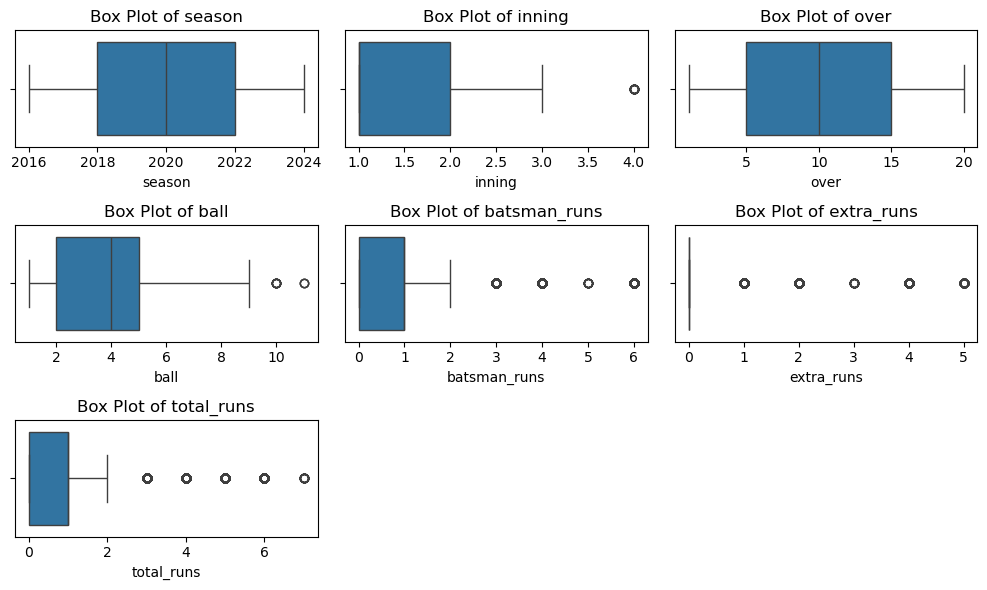

In [234]:
plt.figure(figsize=(10, 6))

for i, col in enumerate(num):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x= df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

Their are no outliers 

------------

## Exploratory Data Analysis

### Univariate Analysis

In [235]:
cat = ['venue', 'batting_team', 'bowling_team', 'batter', 'bowler',
       'non_striker', 'winner', 'win_by', 'match_type', 'player_of_match',
       'umpire_1', 'umpire_2']

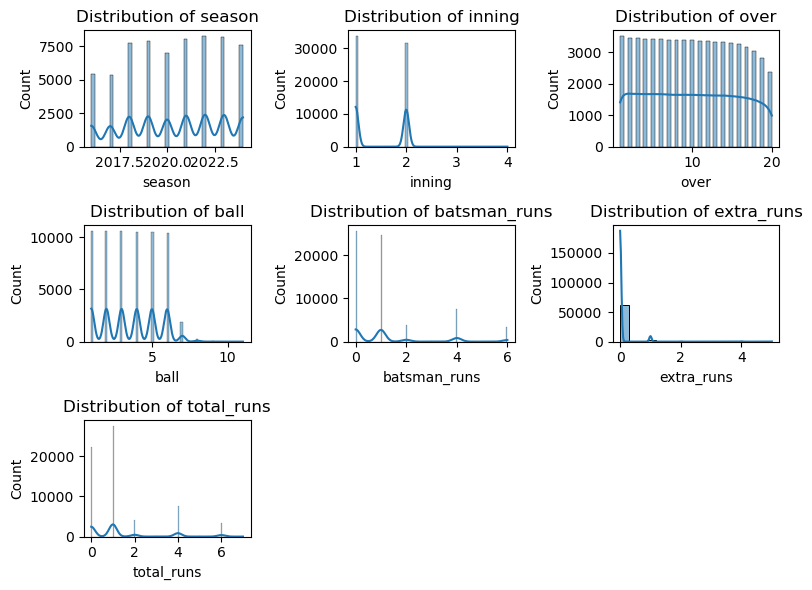

In [236]:
plt.figure(figsize=(8, 6))
for i, col in enumerate(num):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [237]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%b')

**Matches per year & Avg Runs per Over**

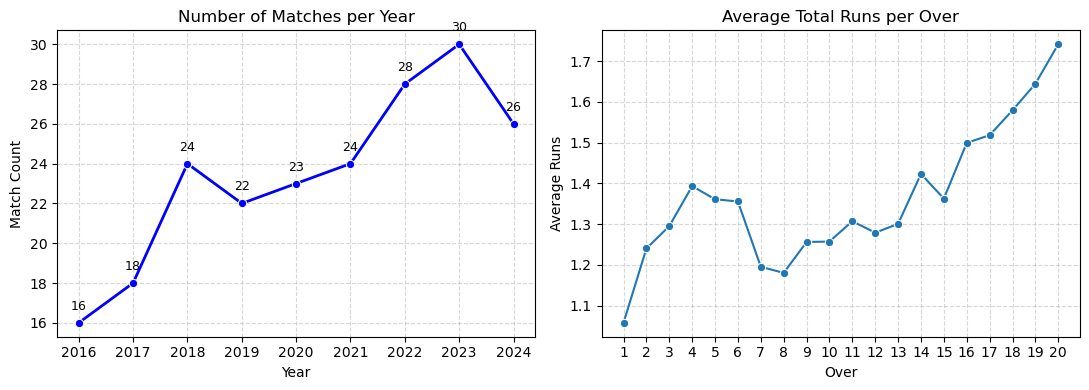

In [238]:
matches_per_year = df.groupby('year')['date'].nunique().reset_index(name='matches')
avg_runs_per_over = df.groupby('over')['total_runs'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

sns.lineplot(x='year', y='matches', data=matches_per_year, marker='o', linewidth=2, color='blue', ax=axes[0])
axes[0].set_title('Number of Matches per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Match Count')
axes[0].grid(True, linestyle='--', alpha=0.5)

for i in range(len(matches_per_year)):
    year = matches_per_year.loc[i, 'year']
    count = matches_per_year.loc[i, 'matches']
    axes[0].text(year, count + 0.5, str(count), ha='center', va='bottom', fontsize=9)

sns.lineplot(data=avg_runs_per_over, x='over', y='total_runs', marker='o', ax=axes[1])
axes[1].set_title('Average Total Runs per Over')
axes[1].set_xlabel('Over')
axes[1].set_ylabel('Average Runs')
axes[1].set_xticks(range(1, 21))
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

- The number of matches has shown a consistent increase each year, indicating the growing scale and popularity of the PSL tournament over time.
- Runs are scored more rapidly during the Powerplay (overs 1–6) and the death overs (16–20)

**Runs Scored on Each Ball**

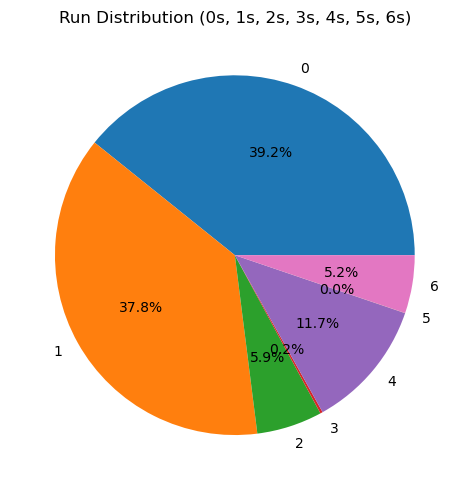

In [239]:
run_distribution = df['batsman_runs'].value_counts().loc[[0, 1, 2, 3, 4, 5, 6]].sort_index()

plt.figure(figsize=(5, 5))
plt.pie(run_distribution, labels=run_distribution.index, autopct='%1.1f%%')
plt.title('Run Distribution (0s, 1s, 2s, 3s, 4s, 5s, 6s)')
plt.tight_layout()
plt.show()

**Most freq Venue**

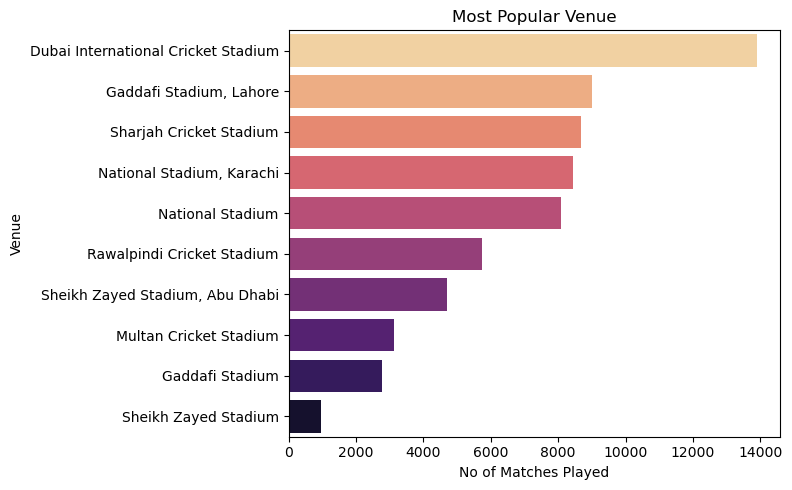

In [240]:
most_freq_venue = df.groupby('venue')['venue'].value_counts().sort_values(ascending=False).reset_index(name='count')

plt.figure(figsize=(8, 5))
sns.barplot(y='venue', x='count', data=most_freq_venue, palette='magma_r')
plt.title('Most Popular Venue')
plt.ylabel('Venue')
plt.xlabel('No of Matches Played')
plt.tight_layout()
plt.show()

Dubai International Cricket Stadium leading with the most matches played venue over the last 10 years.

**Matches played by each team**

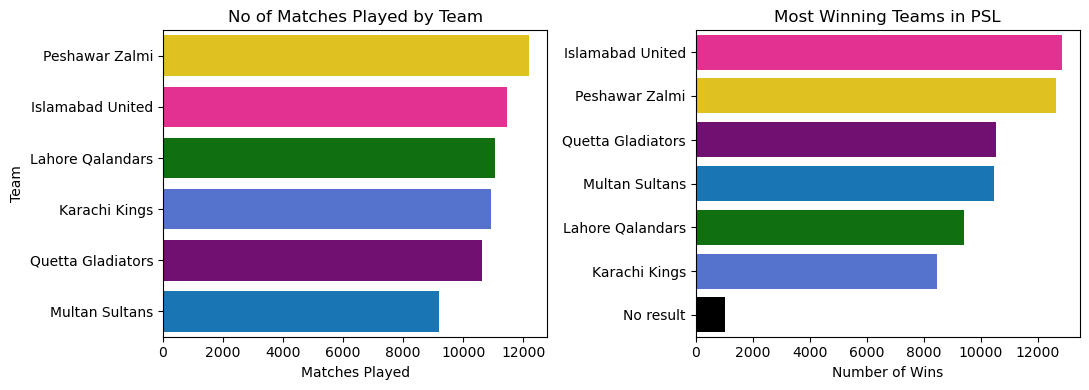

In [254]:
matches_played_by_team = df.groupby('batting_team')['batting_team'].value_counts().sort_values(ascending=False).reset_index(name='matches_played')

winning_teams = df['winner'].value_counts().reset_index()
winning_teams.columns = ['Team', 'Wins']

team_colors = {'Peshawar Zalmi': 'gold',
               'Quetta Gladiators': 'purple',
               'Karachi Kings': 'royalblue',
               'Islamabad United': 'deeppink', 
               'Multan Sultans': '#007acc', 
               'Lahore Qalandars': 'green',
               'No result': 'black'}

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

sns.barplot(data=matches_played_by_team, y='batting_team', x='matches_played',
            palette=team_colors, ax=axes[0])
axes[0].set_title('No of Matches Played by Team')
axes[0].set_xlabel('Matches Played')
axes[0].set_ylabel('Team')

sns.barplot(data=winning_teams, y='Team', x='Wins', palette=team_colors, ax=axes[1])
axes[1].set_title('Most Winning Teams in PSL')
axes[1].set_xlabel('Number of Wins')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

- Peshawar Zalmi had played the most matches among all teams, while Multan Sultans has played the fewest matches, as they joined the PSL in 2018.
- Islamabad United & Peshawar Zalmi have the most wins in the PSL, Karachi Kings have the fewest wins.


**No of Matches played by top 10 Batsmen and Bowler**

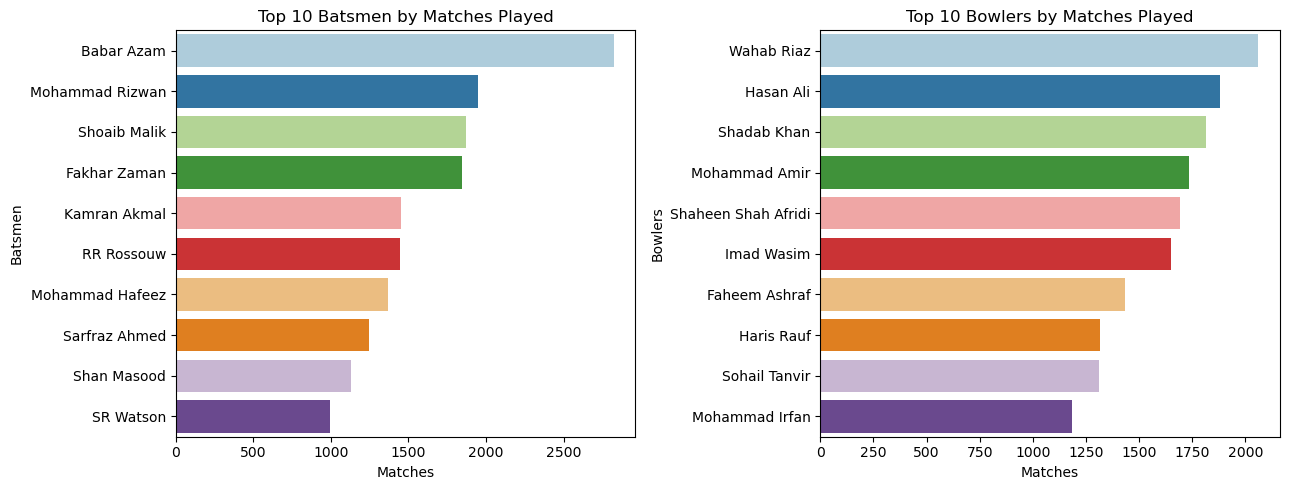

In [242]:
batsmen_matches = df.groupby('batter')['batter'].count().sort_values(ascending=False).head(10)
bowler_matches = df.groupby('bowler')['bowler'].count().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

sns.barplot(y=batsmen_matches.index, x=batsmen_matches.values, palette='Paired' ,ax=axes[0])
axes[0].set_title('Top 10 Batsmen by Matches Played')
axes[0].set_xlabel('Matches')
axes[0].set_ylabel('Batsmen')

sns.barplot(y=bowler_matches.index, x=bowler_matches.values, palette='Paired', ax=axes[1])
axes[1].set_title('Top 10 Bowlers by Matches Played')
axes[1].set_xlabel('Matches')
axes[1].set_ylabel('Bowlers')

plt.tight_layout()
plt.show()

- Among all batsmen, Babar Azam has played the highest number of matches.
- Among bowlers, Wahab Riaz holds the record for most matches played.

------------


### Bivariate Analysis

**Which batting team scores the most against which bowling team**

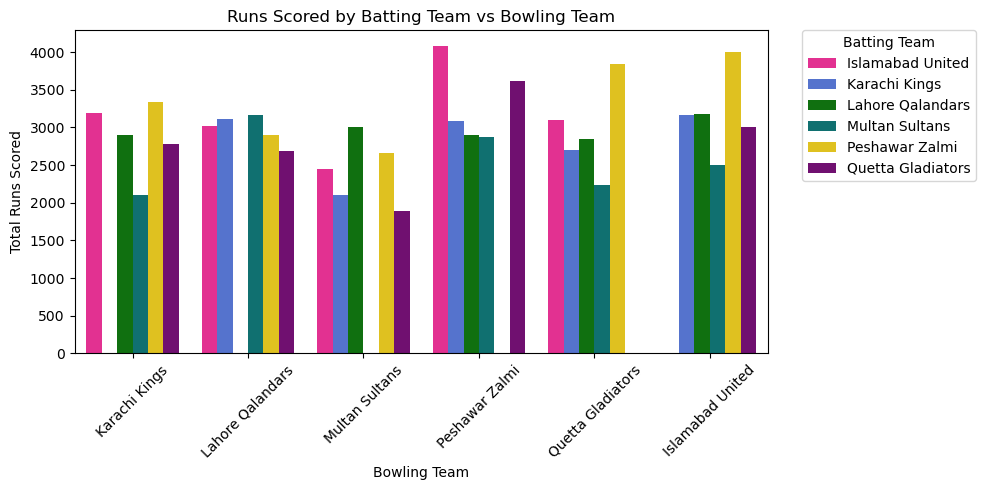

In [243]:
runs_by_teams = df.groupby(['batting_team', 'bowling_team'])['total_runs'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=runs_by_teams, x='bowling_team', y='total_runs', hue='batting_team', palette=team_colors)
plt.title('Runs Scored by Batting Team vs Bowling Team')
plt.xlabel('Bowling Team')
plt.ylabel('Total Runs Scored')
plt.legend(title='Batting Team', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


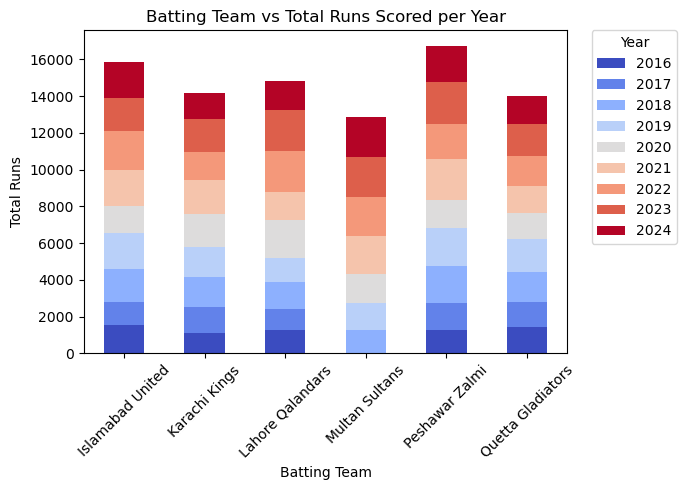

In [244]:
team_runs = df.groupby(['batting_team', 'year'])['total_runs'].sum().unstack().fillna(0)

team_runs.plot(kind='bar', stacked=True, figsize=(7, 5), colormap='coolwarm')
plt.title('Batting Team vs Total Runs Scored per Year')
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


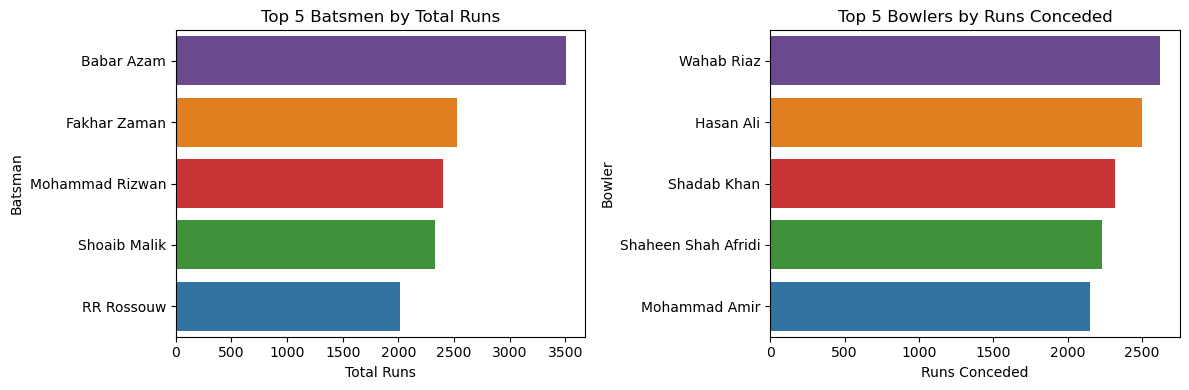

In [245]:
top_batsmen = df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(5).reset_index()
top_batsmen.columns = ['Batsman', 'Total Runs']

top_bowlers_conceded = df.groupby('bowler')['total_runs'].sum().sort_values(ascending=False).head(5).reset_index()
top_bowlers_conceded.columns = ['Bowler', 'Runs Conceded']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(data=top_batsmen, x='Total Runs', y='Batsman', ax=axes[0], palette='Paired_r')
axes[0].set_title('Top 5 Batsmen by Total Runs')
axes[0].set_xlabel('Total Runs')
axes[0].set_ylabel('Batsman')

sns.barplot(data=top_bowlers_conceded, x='Runs Conceded', y='Bowler', ax=axes[1], palette='Paired_r')
axes[1].set_title('Top 5 Bowlers by Runs Conceded')
axes[1].set_xlabel('Runs Conceded')
axes[1].set_ylabel('Bowler')

plt.tight_layout()
plt.show()


- Babar Azam leads the charts with the most runs scored in PSL history
- Wahab Riaz has conceded the most runs throughout all PSL seasons

<Figure size 800x500 with 0 Axes>

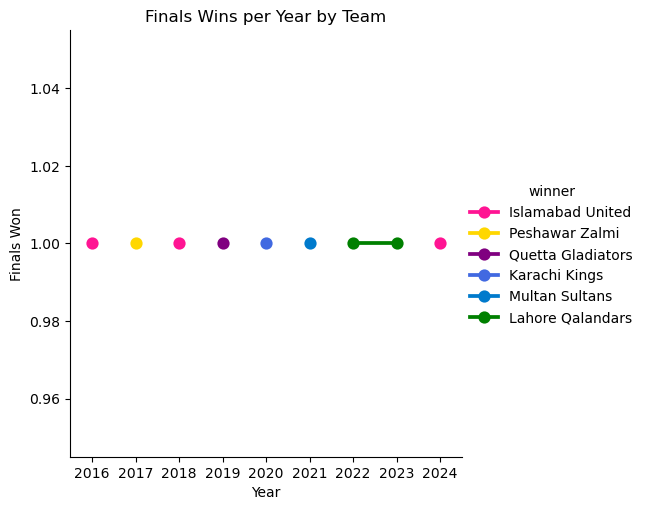

In [255]:
finals_df = df[df['match_type'] == 'final']
unique_finals = finals_df.drop_duplicates(subset=['year', 'date'])
final_wins_per_year = unique_finals.groupby(['year', 'winner']).size().reset_index(name='Finals_Won')

plt.figure(figsize=(8, 5))
sns.catplot(data=final_wins_per_year, x='year', y='Finals_Won', hue='winner', kind='point', palette=team_colors)

plt.title('Finals Wins per Year by Team')
plt.xlabel('Year')
plt.ylabel('Finals Won')
plt.show()

- Islamabad Wins 3 time in 2016, 2018 and 2024
- Lahore Qalandars Wins 2 times in 2022 and 2023
- Remian teams win one one time

. Historical Team Performance (Wins per Year)
Chart Type: Line plot.

What It Tells You: Tracks how each team's performance (wins) has evolved over the years. Teams with consistent wins or improving performance are more likely to do well in future finals.

2. Top Performers by Batting and Bowling
Chart Type: Two line plots (one for top batsmen, one for top bowlers).

What It Tells You: Analyzes the consistency and performance of individual batsmen and bowlers over the years. This helps identify which players have been instrumental in their teams' victories.

3. Team Win-Loss Ratio Over Time
Chart Type: Line plot comparing the win-loss ratio of teams over the years.

What It Tells You: Teams with a consistent or improving win ratio are more likely to have the mental toughness needed in a final.

4. Batting and Bowling Economy Rates
Chart Type: Line plot comparing the batting and bowling economy rates of different teams.

What It Tells You: Teams with low bowling economy and high batting economy tend to perform well, especially in high-pressure final matches.

5. Player of the Match Awards and Team Success
Chart Type: Line plot for each team showing the number of Player of the Match awards per year.

What It Tells You: A team with more Player of the Match awards may indicate that key players are stepping up when needed, which is crucial in a final.

6. Match Performance in Powerplay and Death Overs
Chart Type: Line plot comparing team performance in powerplay overs (1-6) and death overs (16-20).

What It Tells You: Teams with strong performances in the powerplay and death overs often dominate in critical moments of a final match.

7. Head-to-Head Performance in Finals
Chart Type: Line plot for each pair of teams showing their win-loss ratio in finals.

What It Tells You: If a team consistently beats its opponent in finals, this could be an important factor in predicting future outcomes.

8. Team Performance at Different Venues
Chart Type: Line plot of team performance (win/loss) at different PSL venues.

What It Tells You: Some teams perform better at specific venues. Analyzing this data can give an advantage in predicting performance at the venue of the 2025 final.

9. Impact of Player Injuries or Changes
Chart Type: Line plot showing the number of wins/losses before and after key players were injured or replaced.

What It Tells You: Teams that maintain consistency even when key players are unavailable are stronger contenders for the final.

10. Player Form Over Recent Matches
Chart Type: Line plot for the recent performances of key players (batsmen and bowlers).

What It Tells You: Teams with players in top form (consistently scoring runs or taking wickets) leading up to the final will be stronger.

11. Net Run Rate (NRR) Over Time
Chart Type: Line plot comparing each team's Net Run Rate (NRR) over different seasons.

What It Tells You: A team with a higher NRR is likely to win by larger margins, which indicates dominance in matches, crucial for a final.

12. Total Runs Scored per Team
Chart Type: Line plot for each team showing total runs scored per year.

What It Tells You: Teams with a consistently high run-scoring ability are likely to be stronger competitors in a final.

13. Total Runs Conceded per Team
Chart Type: Line plot for each team showing the total runs conceded per year.

What It Tells You: Teams that are able to limit runs and bowl well under pressure are better prepared for finals.

14. Consistency in Batting Performance
Chart Type: Line plot for individual batsmen showing their average runs per match over the years.

What It Tells You: Consistent batsmen are key in big matches. Players who perform well year after year can carry their team to a final win.

15. Bowling Strike Rates Over Time
Chart Type: Line plot showing bowling strike rates for top bowlers.

What It Tells You: Bowlers with low strike rates who can take wickets consistently are valuable assets in crucial final games.

16. Average Score per Over
Chart Type: Line plot comparing each team's average score per over across seasons.

What It Tells You: Teams with high average scores per over are more likely to build strong innings in high-pressure situations like finals.

17. Total Wickets Taken per Team
Chart Type: Line plot showing total wickets taken per team.

What It Tells You: A team with a strong bowling attack and the ability to take wickets consistently has an advantage in finals.

18. Team Consistency in Fielding
Chart Type: Line plot showing the number of dropped catches and fielding errors per year for each team.

What It Tells You: Teams that have fewer fielding mistakes are often the ones that win finals, where every play counts.

19. Chase vs Defend (Runs Chased vs Defended)
Chart Type: Line plot comparing runs successfully chased vs defended by each team in finals.

What It Tells You: Teams that excel in either chasing or defending can dictate the pace of the match in the final.

20. Batting vs Bowling Strength
Chart Type: Line plot showing the batting and bowling strength (runs scored vs wickets taken) for each team over time.

What It Tells You: Teams that balance both strong batting and bowling have a better chance of winning finals, as they are prepared for any match scenario.